# Training a Restricted Boltzmann Machine (RBM) to reconstruct MNIST images

Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1.     Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2.     Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3.     Reconstruct the original test images from their hidden encoding and confront the reconstructions with the original image (use a suitable quantitative metric to assess the reconstraction quality and also choose few examples to confront visually).


# Import libraries and MNNIST dataset

In [1]:
import numpy as np
import gzip
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from RBM import *

from keras.datasets import mnist

2023-04-02 18:28:05.790134: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 18:28:06.210199: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 18:28:06.210237: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 18:28:07.986662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Import MNIST with Keras


In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print("Shapes are respectly train_X, train_y, test_X, test_y ", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# For dataset that use a small number 
# of equiprobable classe we set the ideal minibatch size to number of classes
minibatch_size = 10

Shapes are respectly train_X, train_y, test_X, test_y  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
def binarize_data(data):
    # Taking mnist train_X clump values that are greater than 0 and set them to 1
    # and the rest to 0
    data[data > 0] = 1
    return data

In [10]:
# binarizing our dataset
train_X = binarize_data(train_X)
train_y = binarize_data(train_y)
test_X, test_y = binarize_data(test_X), binarize_data(test_y)

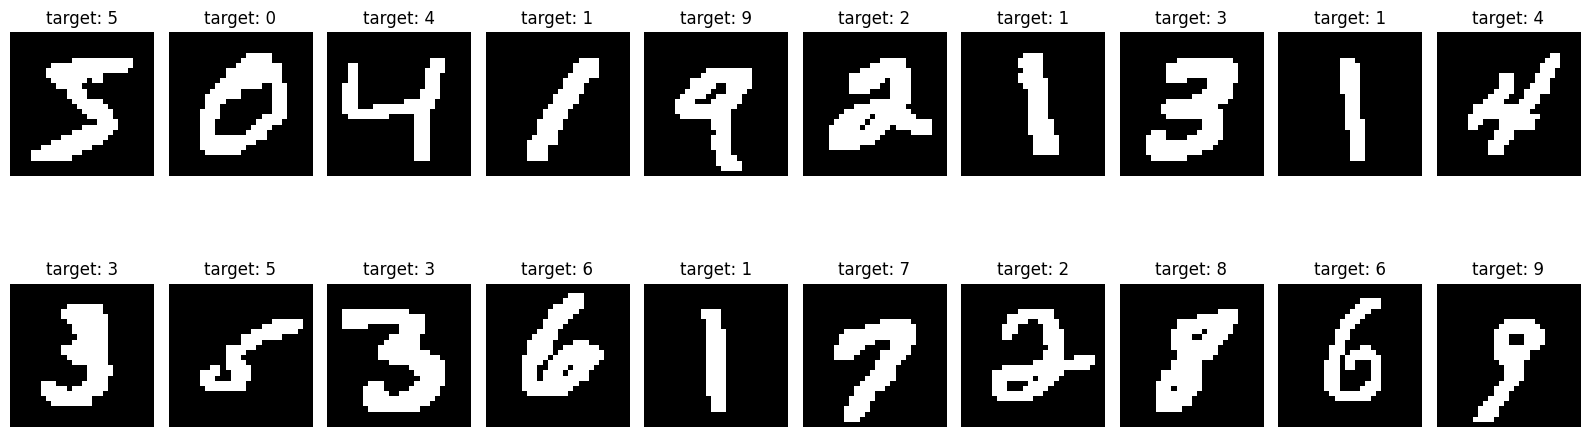

In [ ]:
# Show the data
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(train_X[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {train_y[i]}")
    
plt.tight_layout()

# Basics of RBM

RBMs are bipartite graphs with visible units $v$ and hidden units $h$. The visible units are connected to the hidden units with weights $W_{ij}$, and the hidden units are connected to the visible units with weights $W_{ji}$. The units are binary, and the weights are real-valued. The units are connected by a symmetric matrix $W$.


In [2]:
rbm = RBM(784, 100, 10, 0.03)